## M2 - Model prediksi titik panas di Sumatera Selatan 2001 - 2023

In [1]:
# lib manipulation data
import pandas as pd

# load all functions
from C01_data_collection import *
from C02_visualization import *
from C03_preprocessing import *
from C04_model_predictions import *
from C05_model_evaluate import *

- config models

In [2]:
# set random number
import random as rm
rm.seed(1234)

# set random number
import numpy as np
np.random.seed(1234)

# set random number
import tensorflow as tf
tf.random.set_seed(1234)

1. Data Collections

In [3]:
# load dataset
dataset = data_hotspot("dataset_enso.csv")
print(dataset.head())

    acq_date  hotspot  sst_std  sst_anom  oni_std  oni_anom  soi_std  soi_anom
0 2001-01-31        3    25.81     -0.76    25.88     -0.68      1.0       1.6
1 2001-02-28        5    26.18     -0.56    26.26     -0.52      1.7       2.8
2 2001-03-31       10    26.86     -0.37    26.76     -0.44      0.9       1.5
3 2001-04-30       20    27.24     -0.56    27.25     -0.34      0.2       0.3
4 2001-05-31       39    27.42     -0.46    27.49     -0.25     -0.5      -0.8


2. Data Preprocessing

In [4]:
# prosess normalization min-max
scaled = normalized(dataset, ["hotspot", "sst_anom", "oni_anom", "soi_anom"])
print(pd.DataFrame(scaled, columns=["hotspot", "sst_anom", "oni_anom", "soi_anom"]))

      hotspot  sst_anom  oni_anom  soi_anom
0   -1.000000 -0.614849 -0.551402      0.36
1   -0.999723 -0.522042 -0.476636      0.60
2   -0.999030 -0.433875 -0.439252      0.34
3   -0.997644 -0.522042 -0.392523      0.10
4   -0.995012 -0.475638 -0.350467     -0.12
..        ...       ...       ...       ...
271 -0.974643  0.341067  0.383178     -0.24
272 -0.689067  0.447796  0.495327     -0.38
273 -0.557018  0.475638  0.598131     -0.12
274 -0.946377  0.619490  0.663551     -0.22
275 -0.994596  0.661253  0.686916     -0.04

[276 rows x 4 columns]


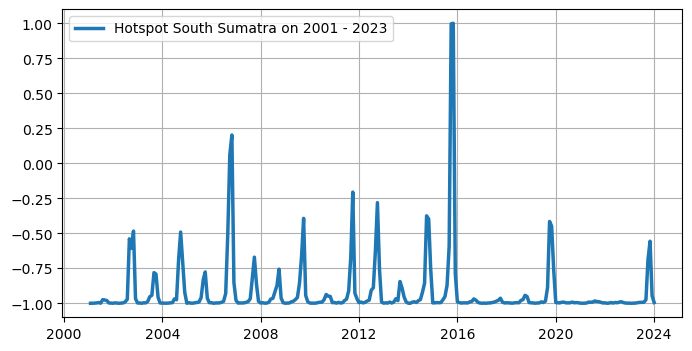

In [5]:
# results of normalizations min-max
lineplot1(dataset["acq_date"], scaled[:,0:1], "Hotspot South Sumatra on 2001 - 2023")

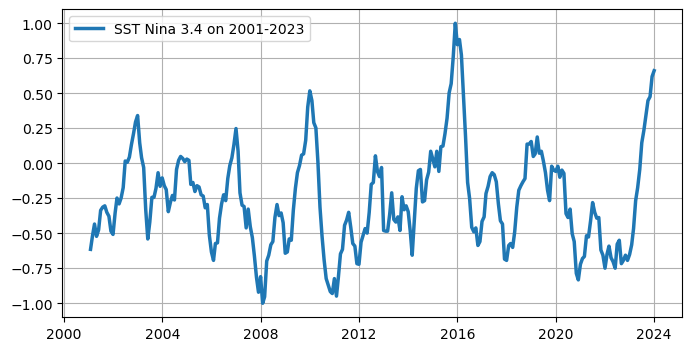

In [6]:
# results of normalizations min-max
lineplot1(dataset["acq_date"], scaled[:,1:2], "SST Nina 3.4 on 2001-2023")

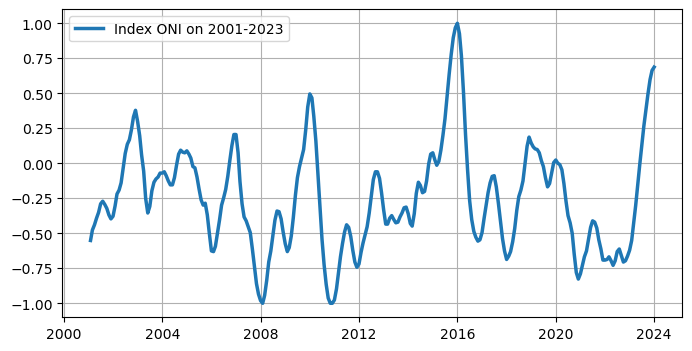

In [7]:
# results of normalizations min-max
lineplot1(dataset["acq_date"], scaled[:,2:3], "Index ONI on 2001-2023")

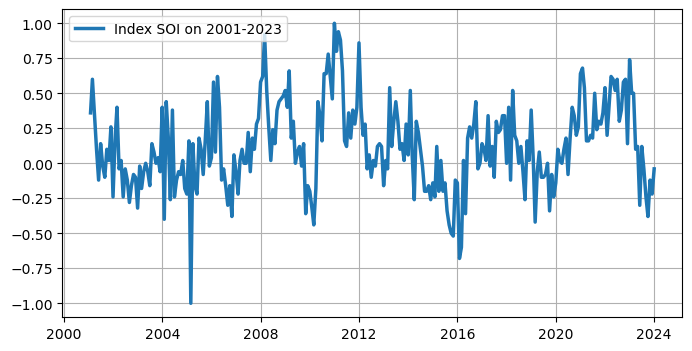

In [8]:
# results of normalizations min-max
lineplot1(dataset["acq_date"], scaled[:,3:4], "Index SOI on 2001-2023")

3. Data Splitting

In [9]:
# process splittings
train_data, test_data = splitting(scaled)

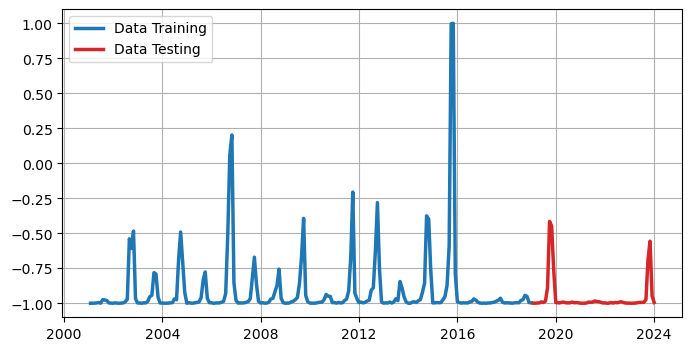

In [17]:
# results splittings
lineplot2(
  x1=dataset.iloc[0:len(train_data),0], y1=train_data[:,0:1], label1="Data Training",
  x2=dataset.iloc[len(train_data):len(dataset),0], y2=test_data[:,0:1], label2="Data Testing",
)

4. Supervised Learning

In [12]:
# set supervised learning for data train
reframed_train = process_multivariate_supervised(train_data, 1, 1)
reframed_train.drop(reframed_train.columns[[5,6,7]], axis=1, inplace=True)

In [18]:
print(reframed_train)

     var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)   var1(t)
1    -1.000000  -0.614849  -0.551402       0.36 -0.999723
2    -0.999723  -0.522042  -0.476636       0.60 -0.999030
3    -0.999030  -0.433875  -0.439252       0.34 -0.997644
4    -0.997644  -0.522042  -0.392523       0.10 -0.995012
5    -0.995012  -0.475638  -0.350467      -0.12 -0.999307
..         ...        ...        ...        ...       ...
211  -0.979631  -0.160093  -0.191589       0.12 -0.974228
212  -0.974228  -0.132251  -0.126168      -0.06 -0.943328
213  -0.943328  -0.109049  -0.004673      -0.26 -0.951642
214  -0.951642   0.136891   0.121495       0.16 -0.995150
215  -0.995150   0.136891   0.186916       0.02 -0.996813

[215 rows x 5 columns]
